The following code is loading the lip reading dataset and transforming the images into constant size 3D Tensors. The images are taken from 15 different people who are lip reading 10 different words. These lip reading images are stored in a directory, and the code reads each image, resizes it to a constant size, and converts it to grayscale. The code then appends these images to create a sequence for each word. The code separates the data into training, validation, and test sets, and normalizes the data by scaling the pixel values between 0 and 1. The labels for each word are also one-hot encoded for use in training the model.

In [16]:
import numpy as np 
import pandas as pd
import numpy as np
import os
import imutils
import dlib 
import cv2 
import imageio
from imutils import face_utils
from skimage.transform import resize
import time

In [17]:
people = ['F01','F02','F04','F05','F06','F07','F08','F09', 'F10','F11','M01','M02','M04','M07','M08']
# people = ['F01','F02','F04','F05']
data_types = ['words']
folder_enum = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']          
words_di = {i:words[i] for i in range(len(words))}

In [18]:
max_seq_length = 22

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []


MAX_WIDTH = 100
MAX_HEIGHT = 100

The following code is creating constant size 4D tensors from cropped lip regions of lip reading dataset.

In [19]:
t1 = time.time()
UNSEEN_VALIDATION_SPLIT = ['F07', 'M02']
# UNSEEN_VALIDATION_SPLIT = ['F05']

UNSEEN_TEST_SPLIT = ['F04']

directory = 'D:/Projects/MIRACL-VC1/cropped'

for person_id in people:
    tx1 = time.time()
    for data_type in data_types:

        # A for loop that iterates through the different words that are lip read by each person. for count, value in enumerate(values): 
        for word_index, word in enumerate(folder_enum):
#             print(f"Word : '{words[word_index]}'")
            for iteration in instances:
                path = os.path.join(directory, person_id, data_type, word, iteration)
                # filelist = sorted(os.listdir(path + '/'))
                filelist = sorted(os.listdir(path))

                sequence = [] 
                for img_name in filelist:
                    if img_name.startswith('color'):
                        image = imageio.imread(path + '/' + img_name)
                        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                        
                        # This is being done to convert a float-valued image (with values between 0 and 1) to an 8-bit grayscale image with values between 0 and 255.
                        image = 255 * image
                        # Convert to integer data type pixels.
                        image = image.astype(np.uint8)
                        sequence.append(image)        

                # add zeros to remaining indeces 
                pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]   #single image placeholder                       
                sequence.extend(pad_array * (max_seq_length - len(sequence)))
                sequence = np.array(sequence)
                
                # assign the sequence to repective splits
                if person_id in UNSEEN_TEST_SPLIT:
                    X_test.append(sequence)
                    y_test.append(word_index)
                elif person_id in UNSEEN_VALIDATION_SPLIT:
                    X_val.append(sequence)
                    y_val.append(word_index)
                else:
                    X_train.append(sequence)
                    y_train.append(word_index)    
    tx2 = time.time()
    print(f'Finished reading images for person {person_id}. Time taken : {tx2 - tx1} secs.')    
    
t2 = time.time()
print(f"Time taken for creating constant size 3D Tensors from those cropped lip regions : {t2 - t1} secs.")
# A tensor is a multi-dimensional array that can store data of any type (integers, floating point values, etc.). In deep learning, tensors are used to store the data that is fed into the network

C:\Users\deepdesk\AppData\Local\Temp\ipykernel_14816\1417641816.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path + '/' + img_name)


Finished reading images for person F01. Time taken : 5.442631959915161 secs.
Finished reading images for person F02. Time taken : 5.258516550064087 secs.
Finished reading images for person F04. Time taken : 9.28353762626648 secs.
Finished reading images for person F05. Time taken : 8.026113033294678 secs.
Finished reading images for person F06. Time taken : 8.701011657714844 secs.
Finished reading images for person F07. Time taken : 7.386072635650635 secs.
Finished reading images for person F08. Time taken : 6.539915561676025 secs.
Finished reading images for person F09. Time taken : 6.368438005447388 secs.
Finished reading images for person F10. Time taken : 6.136327743530273 secs.
Finished reading images for person F11. Time taken : 6.025261402130127 secs.
Finished reading images for person M01. Time taken : 7.694720506668091 secs.
Finished reading images for person M02. Time taken : 10.318457126617432 secs.
Finished reading images for person M04. Time taken : 8.851693391799927 secs.

In [20]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

This means that X has 1200 samples, each sample has 22 frames (time series) and each frame has 100 x 100 pixels

In [21]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1200, 22, 100, 100)
(200, 22, 100, 100)
(100, 22, 100, 100)


In [22]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [23]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1200,)
(200,)
(100,)


In [26]:
# np.save('X_train',X_train)
# np.save('X_val',X_val)
# np.save('X_test',X_test)
# np.save('y_train',y_train)
# np.save('y_val',y_val)
# np.save('y_test',y_test)

In [33]:
# X_train, X_val, X_test, y_train, y_val, y_test = np.load('X_train.npy'),np.load('X_val.npy'),np.load('X_test.npy'),np.load('y_train.npy'),np.load('y_val.npy'),np.load('y_test.npy')

## Normalization

In [1]:
def normalize_it(X):
    
    # keepdims=True keeps same size as input. This is useful for broadcasting the result.
    # Broadcasting is a technique in NumPy where it automatically expands an array 
    # with smaller dimensions to match the shape of an array with larger dimensions during element-wise operations.
    # For example, in this case, if the shape of the filter was (22, 1, 1) instead of (1, 22, 1, 1),
    #  the result of the convolution would not be broadcastable and an error would be raised. By having the shape (1, 22, 1, 1), 
    # it allows the result to be broadcast to (1200, 22, 1, 1), which is the shape of the output volume.
    v_min = X.min(axis=(2, 3), keepdims=True) #op shape (1200, 22, 1, 1). 
    v_max = X.max(axis=(2, 3), keepdims=True)
    X = (X - v_min)/(v_max - v_min)
    X = np.nan_to_num(X)
    return X

In [35]:
from keras.utils import np_utils, generic_utils

In [ ]:
X_train = normalize_it(X_train)
X_val = normalize_it(X_val)
X_test = normalize_it(X_test)

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_val = np_utils.to_categorical(y_val, 10)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
X_val, y_val = shuffle(X_val, y_val, random_state=0)

In [37]:
X_train = np.expand_dims(X_train, axis=4)
X_val = np.expand_dims(X_val, axis=4)
X_test = np.expand_dims(X_test, axis=4) # op : (100, 22, 100, 100, 1)
# This is often used when working with Convolutional Neural Networks (CNNs) to give them the correct data shape for processing.
# This additional dimension can be interpreted as a channel dimension in case of image data.

In [39]:
# saving the splits for future use.
np.save('X_train',X_train)
np.save('X_val',X_val)
np.save('X_test',X_test)
np.save('y_train',y_train)
np.save('y_val',y_val)
np.save('y_test',y_test)

In [1]:
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [15]:
# # release GPU memory
# from keras import backend as K
# K.clear_session()

# from numba import cuda
# cuda.select_device(0)
# cuda.close()

The Conv3D layer is a 3D convolutional layer in Keras that takes as input a tensor with the shape of (batch_size, time_steps, rows, columns, channels). 3DCNNs are better suited for processing video and image sequences, while regular CNNs are better suited for processing still images.  It takes into consideration both spatial and temporal relationships between the frames, which is crucial for recognizing dynamic features such as facial expressions.
The Conv3D layer is used to detect features in the input image, and the parameters are set to work optimally for this specific use case.

In [2]:
model = Sequential()

# 1st layer group
# 64: Number of filters (or kernels) used in this layer. Each filter will be responsible for detecting a unique feature in the input. A higher number of filters will increase the number of learned features, but also the computational cost.
# (3, 3, 3): The size of the convolutional filter. In this case, it is a 3x3x3 cube. A larger filter size can capture more complex features, but it also increases the computation cost.
# strides = 1: The number of pixels by which the filter will move in each step. In this case, the filter will move 1 pixel at a time.
# input_shape=(22, 100, 100, 1): The shape of the input tensor. In this case, it is (batch_size, time_steps, rows, columns, channels). The batch_size, rows, and columns will be determined at runtime. The time_steps are set to 22 and the channels are set to 1, which indicates that the input data is a grayscale image.
# activation='relu': The activation function used after the convolution operation. ReLU (rectified linear unit) is a popular activation function used in computer vision. It replaces negative values with zero.
# padding='valid': The type of padding used. In this case, it is 'valid' which means that the input will not be padded, and the spatial dimensions of the output will be smaller than the input.
model.add(Conv3D(64, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))

# The MaxPooling3D function is a type of pooling layer in a Convolutional Neural Network (CNN). It reduces the spatial size of the representation by taking the maximum value from each pooling operation. This helps to reduce the computation required for training and also helps in preventing overfitting.
# The arguments used in this line are:
# pool_size: This argument specifies the size of the pooling window that will be applied over each input feature map. In this case, (2, 2, 2) is used which means the pooling window will have size 2x2x2. This means that the window will take the maximum value of the region of size 2x2x2 in each feature map.
# strides: This argument defines the step size at which the pooling window will slide over the input feature maps. In this case, strides=2 means that the pooling window will move by two pixels in each direction (horizontally and vertically) with each step. This means that the output feature map will have half the size in each dimension compared to the input feature map
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(256, (2, 2, 2), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add((Flatten()))

# # FC layers group
model.add(Dense(4096, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 98, 98, 64)    1792      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 49, 49, 64)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 47, 47, 128)    221312    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 4, 23, 23, 128)   0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 3, 22, 22, 256)    262400    
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 1, 11, 11, 256)   0

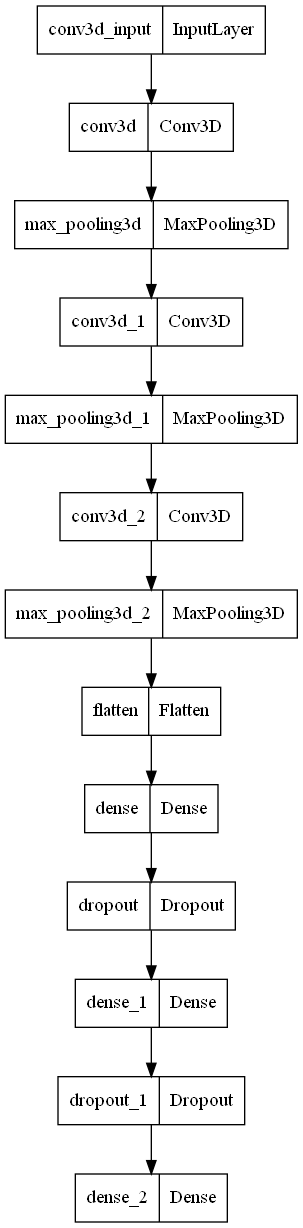

In [3]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

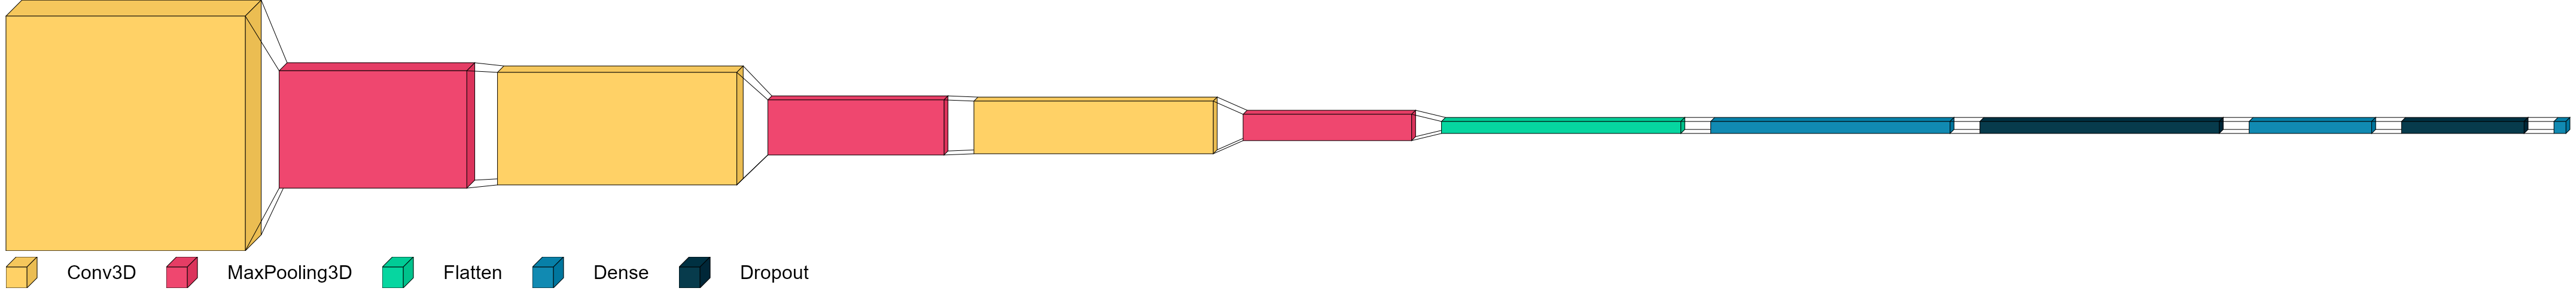

In [15]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font, spacing=50)  # font is optional!

In [17]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 1)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/45
1200/1200 [==============================] - 49s 38ms/step - loss: 2.3053 - accuracy: 0.1075 - val_loss: 2.2940 - val_accuracy: 0.0950
Epoch 2/45
1200/1200 [==============================] - 45s 37ms/step - loss: 2.2950 - accuracy: 0.1158 - val_loss: 2.2793 - val_accuracy: 0.1250
Epoch 3/45
1200/1200 [==============================] - 45s 37ms/step - loss: 2.2760 - accuracy: 0.1342 - val_loss: 2.2124 - val_accuracy: 0.2000
Epoch 4/45
1200/1200 [==============================] - 45s 37ms/step - loss: 2.2551 - accuracy: 0.1583 - val_loss: 2.1842 - val_accuracy: 0.2000
Epoch 5/45
1200/1200 [==============================] - 44s 37ms/step - loss: 2.2086 - accuracy: 0.1758 - val_loss: 2.0871 - val_accuracy: 0.2450
Epoch 6/45
1200/1200 [==============================] - 45s 37ms/step - loss: 2.1133 - accuracy: 0.2308 - val_loss: 1.8989 - val_accuracy: 0.4150
Epoch 7/45
1200/1200 [==============================] - 45s 37ms/step - loss: 1.8817 - accuracy: 0.3100 - val_loss: 1.6627 -

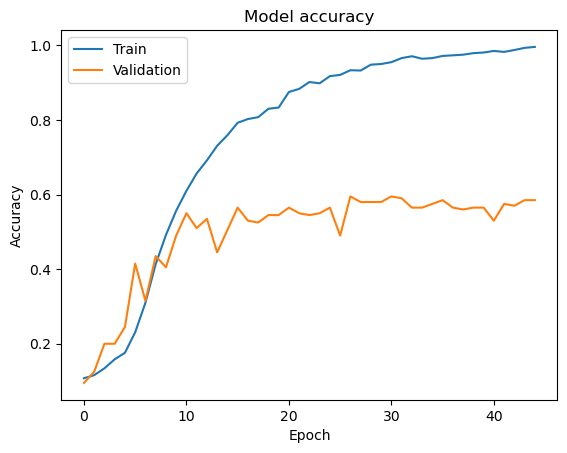

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
model.save('D:/Projects/MIRACL-VC1/models/cnn_adagrad_e45_bc1/model.h5')

In [25]:
model.save_weights('D:/Projects/MIRACL-VC1/models/cnn_adagrad_e45_bc1/model_weights.h5')

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
savedModel=load_model('D:/Projects/MIRACL-VC1/models/cnn_adagrad_e45_bc1/model.h5')

In [ ]:
ypred = savedModel.predict(X_test)

In [ ]:
predicted_words = [words[i] for i in np.argmax(ypred, axis=1)]
actual_words = [words[i] for i in np.argmax(y_test, axis=1)] 

In [ ]:
correct = 0
for p, a in zip(predicted_words, actual_words):
    if p == a:
        correct += 1
#     print(f"Predicted : {p} \t Actual : {a}")

accuracy = correct/len(actual_words)
print(f"Accuracy = {accuracy} on completely unseen data")

In [4]:
file_list = os.listdir('D:/Projects/external_data/cropped')

In [5]:
import numpy as np
import os
import imutils
import dlib # run "pip install dlib"
import cv2 # run "pip install opencv-python"

import imageio
from imutils import face_utils

In [7]:
max_seq_length = 22

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []


MAX_WIDTH = 100
MAX_HEIGHT = 100

In [8]:
from skimage.transform import resize
import time
sequence = []
for img_name in file_list:        
    image = imageio.imread('D:/Projects/external_data/cropped/' + img_name)
    image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
    image = 255 * image
    # Convert to integer data type pixels.
    image = image.astype(np.uint8)
    sequence.append(image)                        
pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]                            
sequence.extend(pad_array * (max_seq_length - len(sequence)))
sequence = np.array(sequence)


C:\Users\deepdesk\AppData\Local\Temp\ipykernel_2696\775558860.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('D:/Projects/external_data/cropped/' + img_name)


In [11]:
X_test.append(sequence)

In [12]:
X_test = np.array(X_test)
print(X_test.shape)

(1, 22, 100, 100)


In [13]:
def normalize_it(X):
    v_min = X.min(axis=(2, 3), keepdims=True)
    v_max = X.max(axis=(2, 3), keepdims=True)
    X = (X - v_min)/(v_max - v_min)
    X = np.nan_to_num(X)
    return X

In [14]:
X_test = normalize_it(X_test)

C:\Users\deepdesk\AppData\Local\Temp\ipykernel_2696\3382126703.py:4: RuntimeWarning: invalid value encountered in true_divide
  X = (X - v_min)/(v_max - v_min)


In [15]:
from keras.utils import np_utils, generic_utils

In [16]:
X_test = np.expand_dims(X_test, axis=4)

In [17]:
print(X_test.shape)

(1, 22, 100, 100, 1)


In [19]:
ypred = savedModel.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [20]:
ypred

array([[9.9690139e-01, 4.7577071e-09, 3.4452377e-09, 7.0146339e-10,
        3.0981945e-03, 2.6367669e-10, 1.3629773e-07, 3.5865384e-07,
        2.3879385e-10, 3.2664069e-08]], dtype=float32)

In [21]:
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']  
predicted_words = [words[i] for i in np.argmax(ypred, axis=1)]
print(predicted_words)

['Begin']


In [22]:
# release GPU memory
from keras import backend as K
K.clear_session()

from numba import cuda
cuda.select_device(0)
cuda.close()

In [20]:
# t1 = time.time()
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 8)
# t2 = time.time()
# print()
# print(f"Training time : {t2 - t1} secs.")

In [43]:
# # release GPU memory
# from keras import backend as K
# K.clear_session()

# from numba import cuda
# cuda.select_device(0)
# cuda.close()

batch_size > 1 returned Out Of Memory error due to insufficient of VRam on the GPU